# Housing Assignment

## Importing necessary libraries

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

# Display Customization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Importing the data

In [3]:
# importing the dataset
Housing = pd.read_csv('train.csv')
# reading the data
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Understanding the data

In [4]:
# datset info
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# shape of dataset
Housing.shape

(1460, 81)

In [6]:
# Summary of dataset
Housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data inspection and data cleaning

In [7]:
#checking duplicates
sum(Housing.duplicated(subset = 'Id')) == 0
# No duplicate values

True

In [8]:
# Null value percentage
round(Housing.isna().sum()/len(Housing),2).sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageType       0.06
GarageCond       0.06
GarageYrBlt      0.06
GarageFinish     0.06
GarageQual       0.06
BsmtFinType1     0.03
BsmtExposure     0.03
BsmtCond         0.03
BsmtQual         0.03
BsmtFinType2     0.03
MasVnrArea       0.01
MasVnrType       0.01
Exterior2nd      0.00
Exterior1st      0.00
OverallCond      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
SalePrice        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtFinSF1       0.00
HeatingQC 

- Seems like only few columns have null values. So, taking a threshold of 10% and removing columns having null values more than 10%

In [9]:
round(Housing.isnull().sum()/len(Housing.index),2)[round(Housing.isnull().sum()/len(Housing.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [10]:
# Dropping these columns
Housing.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'], inplace=True, axis=1)

In [11]:
# Remaining columns having null values
round(Housing.isnull().sum()/len(Housing.index),2)[round(Housing.isnull().sum()/len(Housing.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

- Deriving new columns from YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

In [12]:
# New Derived Columns
Housing['YearBuilt_Old'] = Housing.YearBuilt.max()-Housing.YearBuilt
Housing['YearRemodAdd_Old'] = Housing.YearRemodAdd.max()-Housing.YearRemodAdd
Housing['GarageYrBlt_Old'] = Housing.GarageYrBlt.max()-Housing.GarageYrBlt
Housing['YrSold_Old'] = Housing.YrSold.max()-Housing.YrSold
Housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1384,1939,1950,1939.0,2009,71,60,71.0,1
1050,2007,2007,2007.0,2007,3,3,3.0,3
1436,1971,1971,1974.0,2007,39,39,36.0,3
20,2005,2006,2005.0,2006,5,4,5.0,4
1408,1910,1950,1966.0,2010,100,60,44.0,0
1279,1920,1950,1980.0,2010,90,60,30.0,0
237,1993,2003,1993.0,2010,17,7,17.0,0
804,1954,1954,1954.0,2006,56,56,56.0,4
215,1957,1996,1957.0,2006,53,14,53.0,4
589,1930,1960,1988.0,2008,80,50,22.0,2


In [13]:
# Dropping these columns
Housing = Housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [14]:
# Imputing missing Values for these columns. Also, imputing '-1' for GarageYrBlt as these house does not have Garage.
Housing.MasVnrType.fillna('None',inplace=True)
Housing.MasVnrArea.fillna(Housing.MasVnrArea.mean(),inplace=True)
Housing.BsmtQual.fillna('TA',inplace=True)
Housing.BsmtCond.fillna('TA',inplace=True)
Housing.BsmtExposure.fillna('No',inplace=True)
Housing.BsmtFinType1.fillna('Unf',inplace=True)
Housing.BsmtFinType2.fillna('Unf',inplace=True)
Housing.GarageType.fillna('Attchd',inplace=True)
Housing.GarageYrBlt_Old.fillna(-1,inplace=True)
Housing.GarageFinish.fillna('Unf',inplace=True)
Housing.GarageQual.fillna('TA',inplace=True)
Housing.GarageCond.fillna('TA',inplace=True)

In [15]:
# Dropping these columns as Street and Utilities have nearly 100% values assigned to only one specific value.
# So, it won't help us in the analysis.
Housing = Housing.drop(['Street','Utilities'],axis=1)

In [16]:
# Droppind 'Id' column as well
Housing = Housing.drop('Id',axis='columns')

In [17]:
# Summary
Housing.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [18]:
# Treating the outliers
Housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
90%,120.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,85.100000,60.000000,62.000000,4.000000
95%,160.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,94.000000,60.000000,80.000000,4.000000
99%,190.000000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.820000,60.000000,92

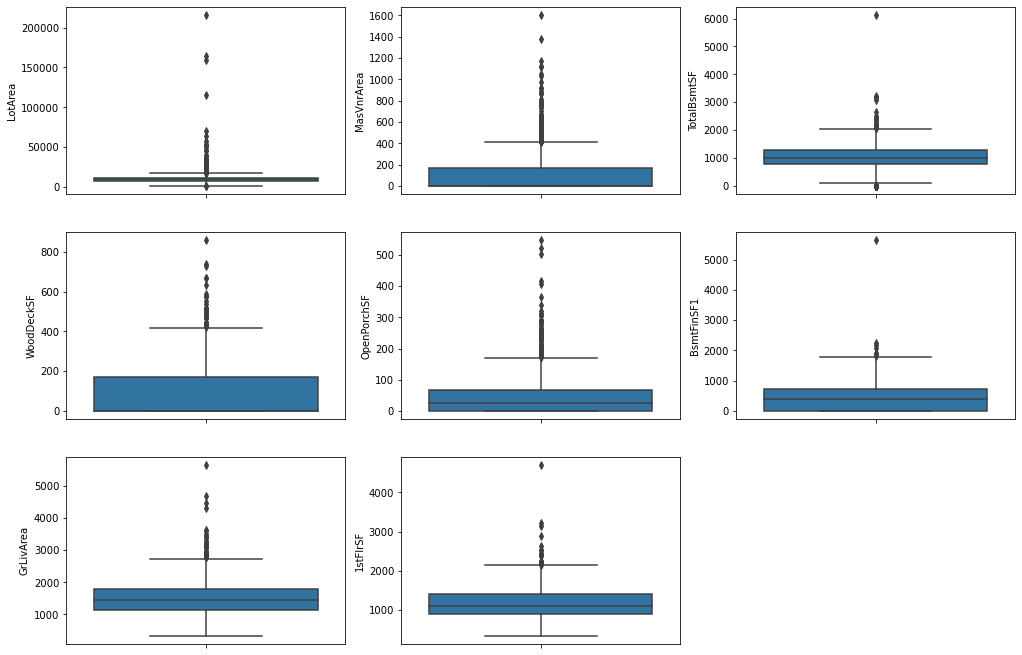

In [19]:
# Plotting boxplots for checking outliers
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = Housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = Housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = Housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = Housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = Housing)
plt.subplot(5,3,6)
sns.boxplot(y = 'BsmtFinSF1', data = Housing)
plt.subplot(5,3,7)
sns.boxplot(y = 'GrLivArea', data = Housing)
plt.subplot(5,3,8)
sns.boxplot(y = '1stFlrSF', data = Housing)
plt.show()

In [20]:
# Removing Outliers

# Removing values beyond 98% for LotArea

quartile_LotArea = Housing['LotArea'].quantile(0.98)
Housing = Housing[Housing["LotArea"] < quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

quartile_MasVnrArea = Housing['MasVnrArea'].quantile(0.98)
Housing = Housing[Housing["MasVnrArea"] < quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

quartile_TotalBsmtSF = Housing['TotalBsmtSF'].quantile(0.99)
Housing = Housing[Housing["TotalBsmtSF"] < quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

quartile_WoodDeckSF = Housing['WoodDeckSF'].quantile(0.99)
Housing = Housing[Housing["WoodDeckSF"] < quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

quartile_OpenPorchSF = Housing['OpenPorchSF'].quantile(0.99)
Housing = Housing[Housing["OpenPorchSF"] < quartile_OpenPorchSF]

# Removing values beyond 99.5% for BsmtFinSF1

quartile_BsmtFinSF1 = Housing['BsmtFinSF1'].quantile(0.995)
Housing = Housing[Housing["BsmtFinSF1"] < quartile_BsmtFinSF1]

# Removing values beyond 99.5% for GrLivArea

quartile_GrLivArea = Housing['GrLivArea'].quantile(0.995)
Housing = Housing[Housing["GrLivArea"] < quartile_GrLivArea]

# Removing values beyond 99% for 1stFlrSF

quartile_1stFlrSF = Housing['1stFlrSF'].quantile(0.99)
Housing = Housing[Housing["1stFlrSF"] < quartile_1stFlrSF]

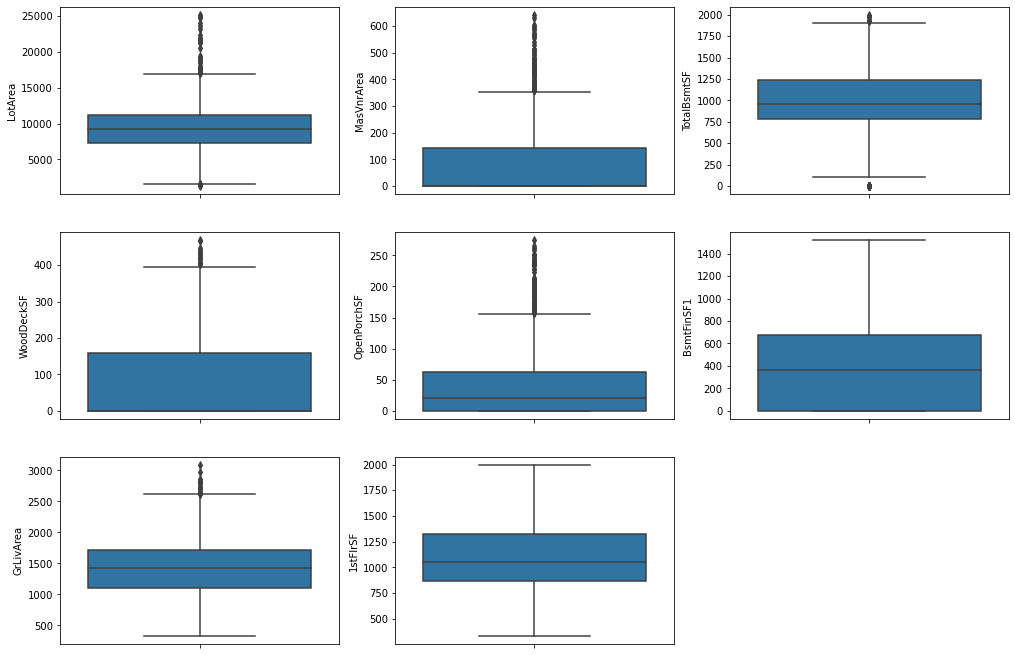

In [21]:
# Replotting boxplots to see if the outliers are still remaining.
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = Housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = Housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = Housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = Housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = Housing)
plt.subplot(5,3,6)
sns.boxplot(y = 'BsmtFinSF1', data = Housing)
plt.subplot(5,3,7)
sns.boxplot(y = 'GrLivArea', data = Housing)
plt.subplot(5,3,8)
sns.boxplot(y = '1stFlrSF', data = Housing)
plt.show()

- Outliers have been taken care of.

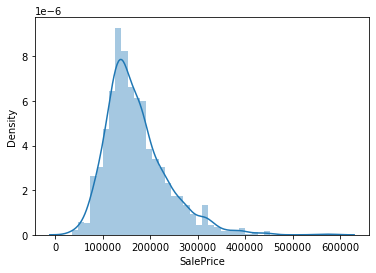

In [22]:
# Target Variable
sns.distplot(Housing['SalePrice'])
plt.show()

In [23]:
# Target Variable is skewed
print("Skewness: %f" % Housing['SalePrice'].skew())

Skewness: 1.326082


- The target variable is skewed. The SalePrice data is highly right skewed as the skewness > 1

In [24]:
#Finding the columns with more correlation with SalePrice
Housing.corr()['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.794131
GrLivArea           0.690248
GarageCars          0.643020
GarageArea          0.629887
TotalBsmtSF         0.597591
FullBath            0.572166
1stFlrSF            0.563317
TotRmsAbvGrd        0.501316
Fireplaces          0.427389
MasVnrArea          0.411960
OpenPorchSF         0.405727
LotArea             0.359703
BsmtFinSF1          0.336782
2ndFlrSF            0.308102
WoodDeckSF          0.291266
HalfBath            0.273999
BsmtFullBath        0.213511
BsmtUnfSF           0.209115
BedroomAbvGr        0.185643
ScreenPorch         0.100397
3SsnPorch           0.067848
YrSold_Old          0.039029
PoolArea            0.019823
MiscVal            -0.016827
BsmtHalfBath       -0.019672
BsmtFinSF2         -0.022807
MSSubClass         -0.062794
LowQualFinSF       -0.076372
OverallCond        -0.091914
KitchenAbvGr       -0.143434
EnclosedPorch      -0.143475
GarageYrBlt_Old    -0.410697
YearRemodAdd_Old   -0.547867
YearBuilt_Old 

### Visualising numerical variable

In [25]:
# numeric variables 
lst=['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice','YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']

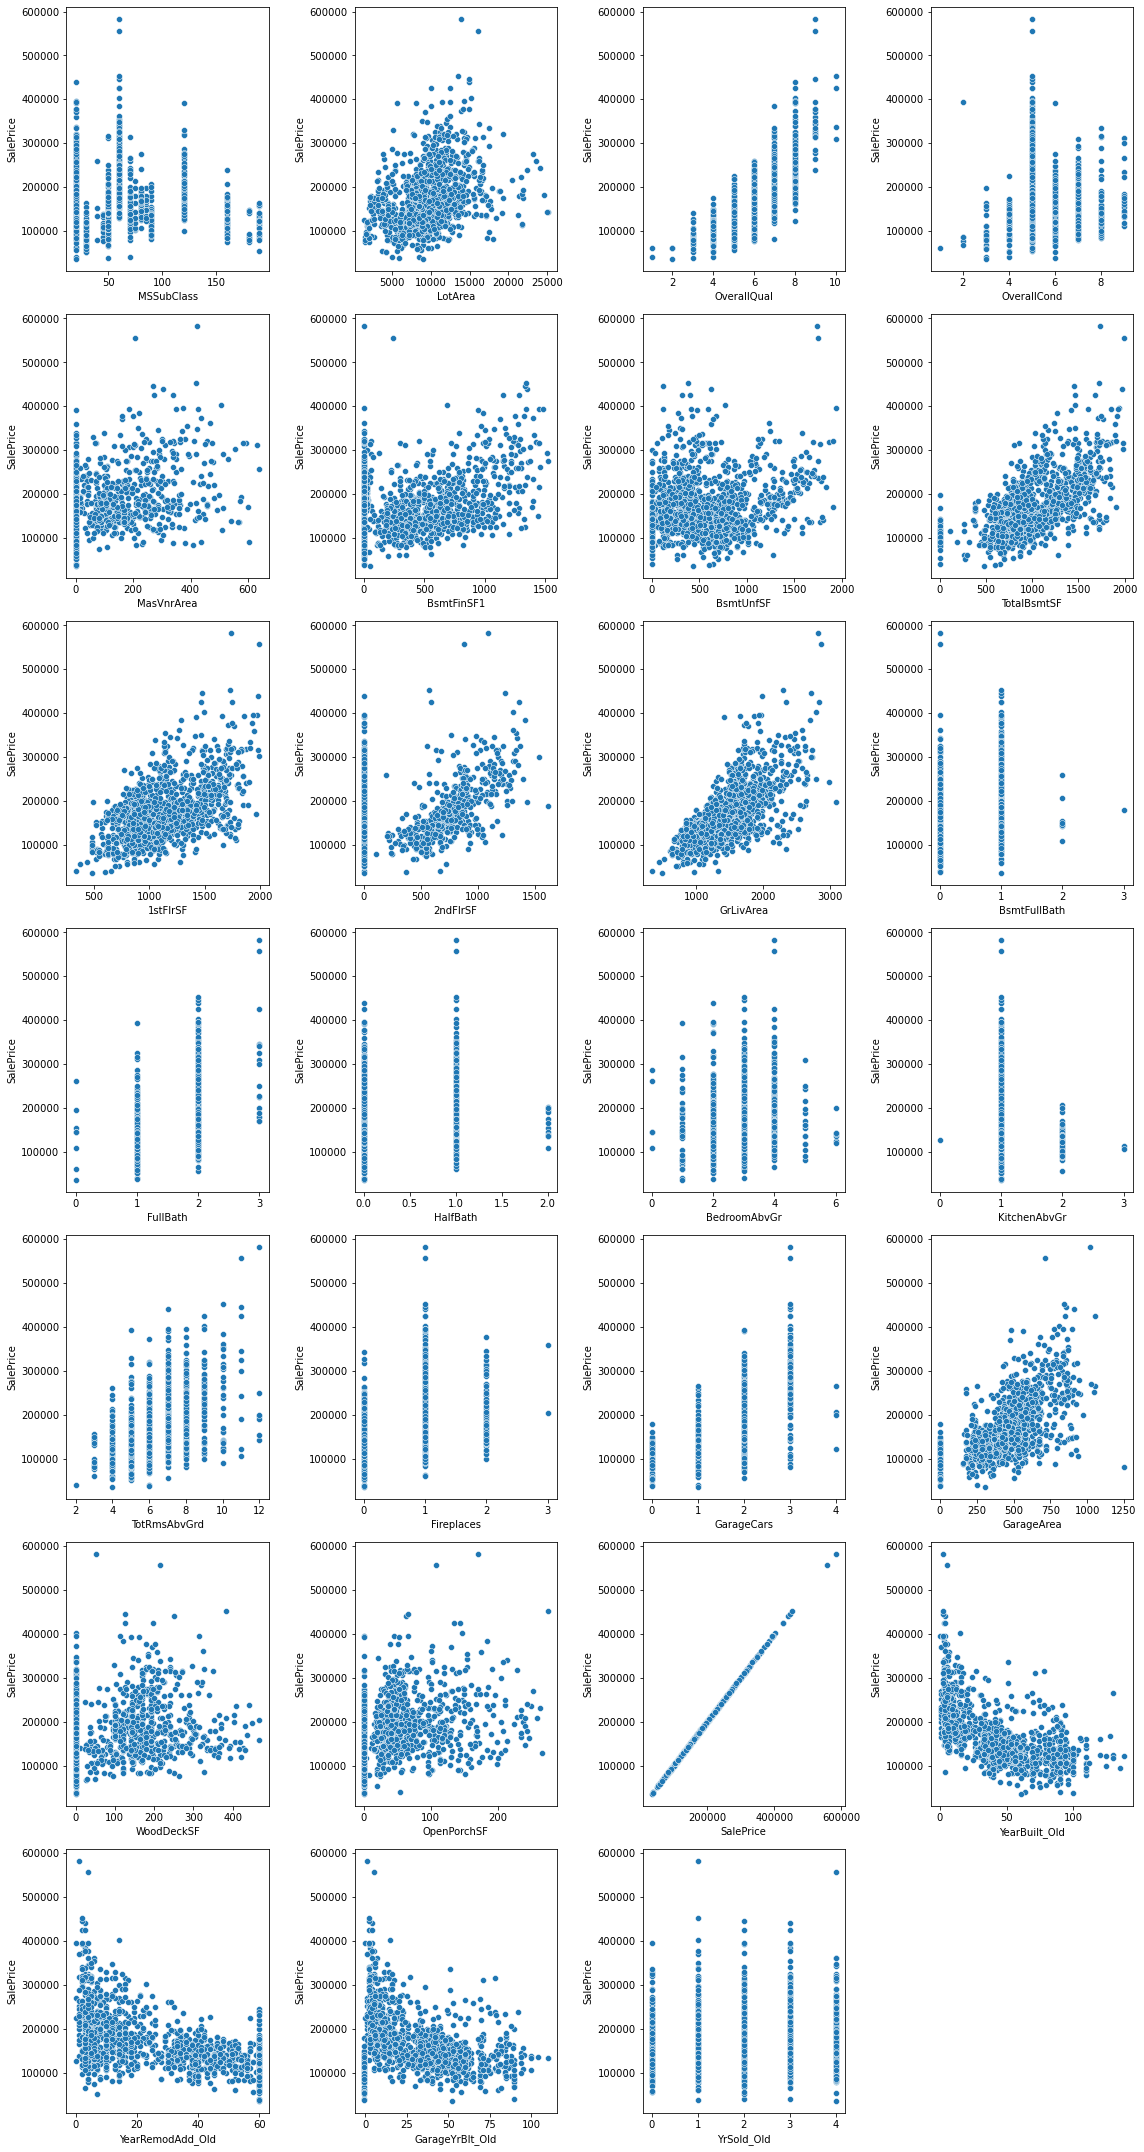

In [26]:
# Scatter plot of these numeric variables to see the relation of these numeric variables with the Target Variable.
plt.figure(figsize=(16,30))
for i in enumerate(lst):
    plt.subplot(7,4,i[0]+1)
    sns.scatterplot(x = i[1],y= 'SalePrice', data = Housing)
plt.tight_layout()
plt.show()

- It seen from the above scatter plots of numerical variable that their is linear relationship of target variable for most of the variables.
- It is clearly seen that "as the Age of the building/house increases the SalePrice shows a downwards trend" i.e. the SalePrice decreases.
- Price of house increases with a NewGarage and also if the house is remodelled.
- Price of the house is also affected by the number of cars that can be parked inside the garage. The more space availability for the cars, the more the SalePrice.

### Visualising categorical variable

In [27]:
# Categorical Variable
lst_cat = ['MSZoning','LotShape','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

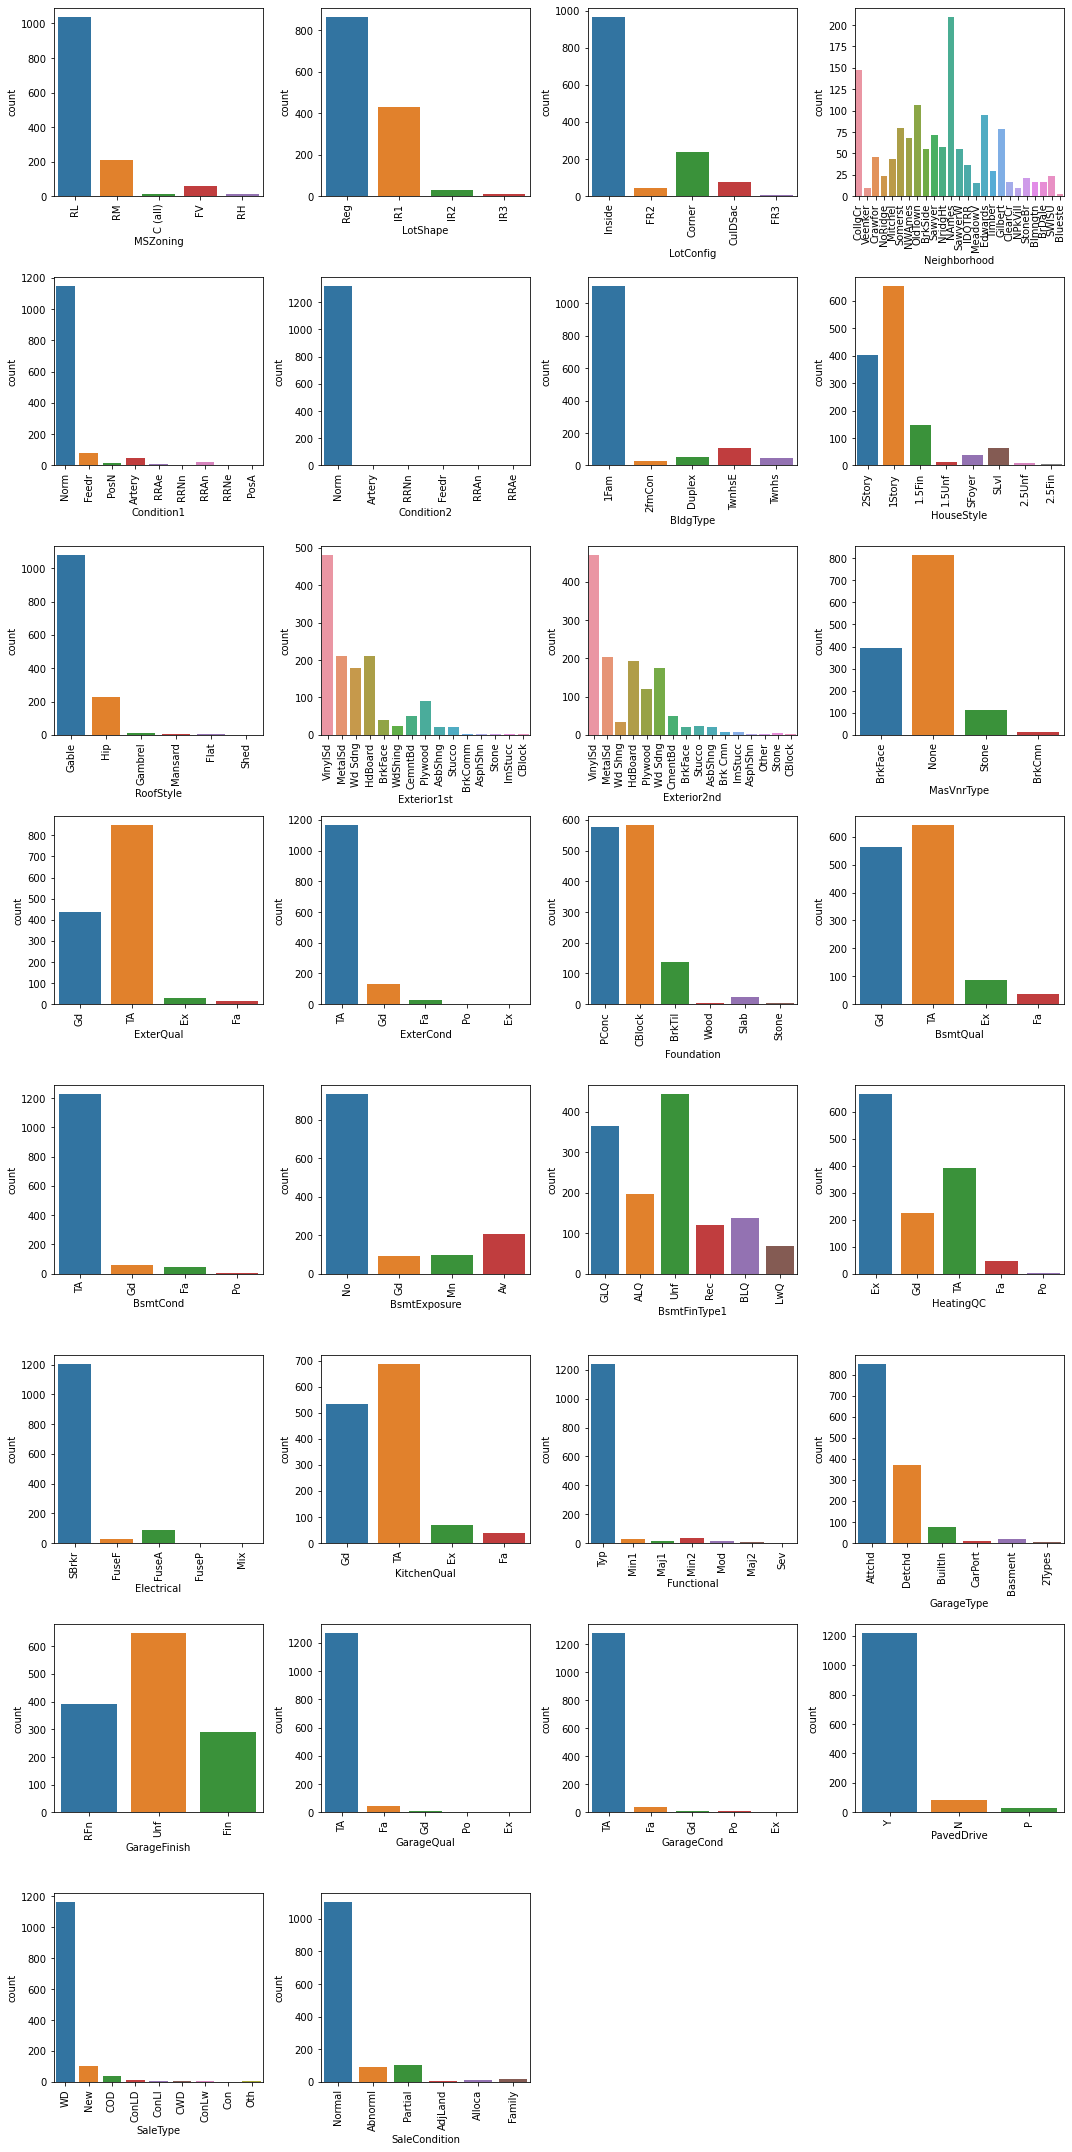

In [28]:
# Visualing categorical Variable 
plt.figure(figsize=(15,30))
for i in enumerate(lst_cat):
    plt.subplot(8,4,i[0]+1)
    sns.countplot(x = i[1], data = Housing)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

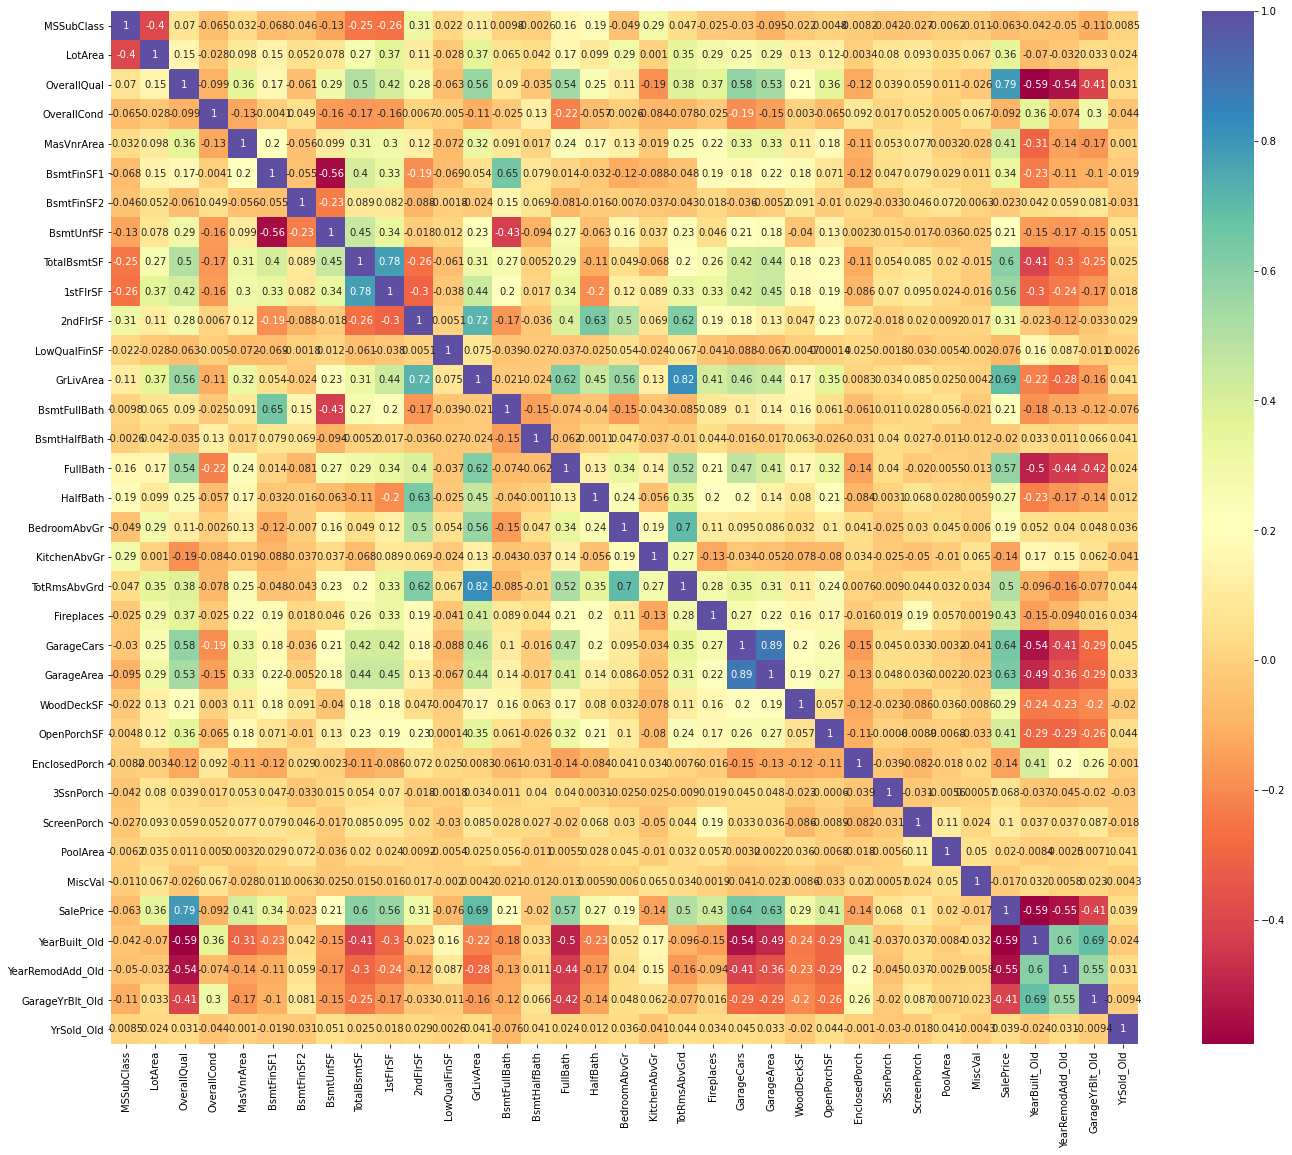

In [29]:
# Correlation heatmap
plt.figure(figsize = (23, 19))
sns.heatmap(Housing.corr(), annot = True, cmap="Spectral")
plt.show()

- From the heatmap it is seen that GarageCars and GarageArea are highly co-related with each other hence they should be removed.
- Also, TotalBsmtSF and 1stFlrSF are highly co-related with each other so they should be removed as well.
- Another columns that are highly co-related are GrLivArea and TotRmsAbvGrd and so they shall be removed.
- There are few other columns that can be removed but we shall let the model decide.

In [30]:
# Dropping TotRmsAbvGrd and leaving the model to decide for the other columns having high correlation.
Housing.drop(['TotRmsAbvGrd'], axis=1,inplace=True)

# Data preparation for model building

In [31]:
# Dataset
Housing.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,10,10,10.0,2


In [32]:
# Mapping the columns having multiple levels
Housing['LandSlope'] = Housing.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
Housing['ExterQual'] = Housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['BsmtQual'] = Housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['BsmtCond'] = Housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['BsmtExposure'] = Housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
Housing['BsmtFinType1'] = Housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Housing['BsmtFinType2'] = Housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Housing['HeatingQC'] = Housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['CentralAir'] = Housing.CentralAir.map({'N':0,'Y':1})
Housing['KitchenQual'] = Housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['GarageFinish'] = Housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
Housing['GarageQual'] = Housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['GarageCond'] = Housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['ExterCond'] = Housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['LotShape'] = Housing.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [33]:
# viewing the mapped columns
Housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [34]:
# getting dummy columns and concating them with main dataset. Also, dropping the original columns whose dummies have been made.
dummy_col = pd.get_dummies(Housing[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

Housing = pd.concat([Housing,dummy_col],axis=1)

Housing = Housing.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis=1)

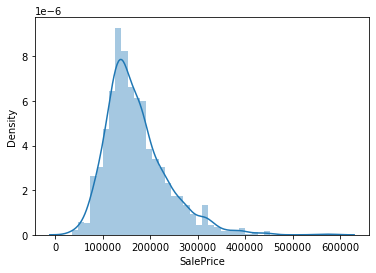

In [35]:
# Target Variable needs to be normalised.
sns.distplot(Housing.SalePrice)
plt.show()

# Splitting the data

In [36]:
# Splitting data into 70:30
df_train,df_test = train_test_split(Housing,train_size=0.7,test_size=0.3,random_state=42)

In [37]:
# Scalling the num_col
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

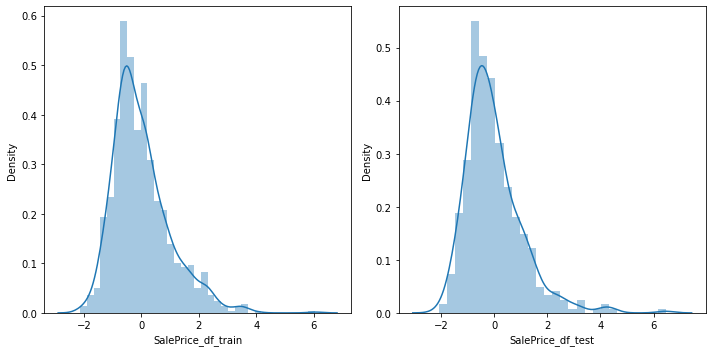

In [38]:
# target variable is normalised
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice)
plt.xlabel('SalePrice_df_train')
plt.subplot(1,2,2)
sns.distplot(df_test.SalePrice)
plt.xlabel('SalePrice_df_test')
plt.tight_layout()

In [39]:
# Removing target variable from training dataset
y_train = df_train.pop('SalePrice')
X_train = df_train

In [40]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [41]:
len(X_train.columns)

189

# RFE to select features

In [42]:
# Using RFE to select features
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [43]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [44]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [45]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Model Building

## Lasso Regression

In [46]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8885183844122007
0.8815384523369565


In [47]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -2.011),
 ('LotArea', 0.241),
 ('LotShape', 0.165),
 ('LandSlope', 0.135),
 ('OverallQual', 0.044),
 ('OverallCond', -0.0),
 ('MasVnrArea', 0.085),
 ('ExterQual', 0.052),
 ('ExterCond', 0.0),
 ('BsmtQual', -0.018),
 ('BsmtCond', 0.322),
 ('BsmtExposure', 0.196),
 ('BsmtFinType1', 0.228),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.11),
 ('BsmtFinSF2', -0.032),
 ('BsmtUnfSF', 0.101),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.105),
 ('CentralAir', 0.133),
 ('1stFlrSF', 0.394),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.453),
 ('GrLivArea', 0.279),
 ('BsmtFullBath', 0.409),
 ('BsmtHalfBath', 0.203),
 ('FullBath', 0.14),
 ('HalfBath', 0.166),
 ('BedroomAbvGr', 0.144),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', -0.0),
 ('Fireplaces', -0.27),
 ('GarageFinish', -0.345),
 ('GarageCars', -0.257),
 ('GarageArea', -0.012),
 ('GarageQual', 0.0),
 ('GarageCond', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.225),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', -0.0),
 ('P

In [48]:
# GridSearchCV for optimal value of alpha
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.026906,0.008238,0.001995,0.002786,0.001,{'alpha': 0.001},0.817370,0.906082,0.894146,0.888641,0.891260,0.848331,0.881028,0.885867,0.882844,0.791562,0.868713,0.035494,1,0.895067,0.884037,0.888570,0.888340,0.887884,0.891384,0.887608,0.887509,0.888966,0.896300,0.889567,0.003510
1,0.009372,0.007653,0.001562,0.004686,0.010,{'alpha': 0.01},0.770718,0.853330,0.868617,0.867677,0.876762,0.826748,0.834661,0.835211,0.866237,0.786318,0.838628,0.034194,2,0.857305,0.844228,0.847161,0.845074,0.845158,0.850652,0.847810,0.846371,0.848319,0.855079,0.848716,0.004159
2,0.006249,0.007653,0.003125,0.006250,0.100,{'alpha': 0.1},0.707372,0.769985,0.813771,0.807833,0.835541,0.758197,0.742463,0.757196,0.792209,0.782428,0.776700,0.035813,3,0.791810,0.776092,0.780909,0.777474,0.776146,0.782703,0.784049,0.781408,0.779831,0.786883,0.781730,0.004690
3,0.003125,0.006249,0.003124,0.006249,1.000,{'alpha': 1.0},-0.005630,-0.020827,-0.006402,-0.031929,-0.001125,-0.004910,-0.093551,-0.015265,-0.004238,-0.000160,-0.018404,0.026771,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006247,0.007651,0.004687,0.007159,5.000,{'alpha': 5.0},-0.005630,-0.020827,-0.006402,-0.031929,-0.001125,-0.004910,-0.093551,-0.015265,-0.004238,-0.000160,-0.018404,0.026771,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


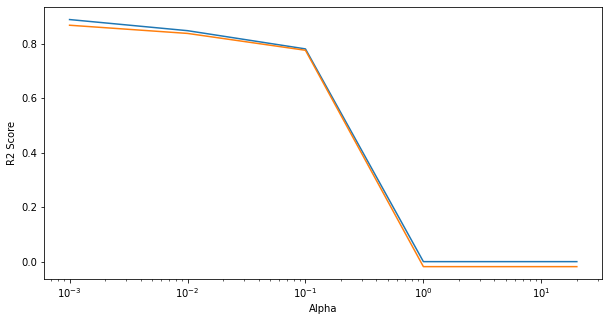

In [50]:
# Plotting line graph to see mean train and test scores for different R2 and alpha values.
plt.figure(figsize=(10,5))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [51]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [52]:
# using best alpha value 0.001 for Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8885183844122007
0.8815384523369565


In [53]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [54]:
lasso_coef.sort_values(by='Coef',ascending=False)

,Featuere,Coef
67,Neighborhood_IDOTRR,0.461262
22,LowQualFinSF,0.453190
24,BsmtFullBath,0.409267
20,1stFlrSF,0.394206
10,BsmtCond,0.321971
52,LandContour_HLS,0.297041
23,GrLivArea,0.279083
63,Neighborhood_CollgCr,0.249275
1,LotArea,0.241243
12,BsmtFinType1,0.228379


In [55]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr: ', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr:  0.8885183844122007
r2_test_lr:  0.8815384523369565
rss1_lr:  103.67790249665342
rss2_lr:  55.021223590676684
mse_train_lr:  0.11148161558779937
mse_test_lr:  0.13789780348540523


## Ridge Regression

In [56]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8961791496184721
0.8758639105377938


In [57]:
# GridSearchCV for optimal value of alpha
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006036,0.007552,0.003257,0.004654,0.001,{'alpha': 0.001},0.828987,0.917553,0.885951,0.881775,0.884628,0.862219,0.886989,0.895079,0.873895,0.789050,0.870613,0.034775,8,0.903172,0.891582,0.896404,0.896333,0.894969,0.898408,0.895475,0.894564,0.897076,0.903510,0.897149,0.003532
1,0.008639,0.005552,0.004548,0.004391,0.010,{'alpha': 0.01},0.828997,0.917595,0.886023,0.881907,0.884737,0.862162,0.887074,0.895047,0.874004,0.789063,0.870661,0.034792,7,0.903171,0.891581,0.896403,0.896333,0.894968,0.898407,0.895474,0.894563,0.897076,0.903509,0.897149,0.003532
2,0.003124,0.006248,0.003124,0.006249,0.100,{'alpha': 0.1},0.829041,0.917825,0.886695,0.883046,0.885717,0.861637,0.887751,0.894723,0.874973,0.789226,0.871063,0.034921,6,0.903127,0.891529,0.896358,0.896277,0.894929,0.898366,0.895425,0.894523,0.897027,0.903472,0.897103,0.003535
3,0.006249,0.007653,0.003124,0.006249,0.200,{'alpha': 0.2},0.829003,0.917822,0.887361,0.884024,0.886635,0.861137,0.888229,0.894380,0.875852,0.789455,0.871390,0.035000,5,0.903021,0.891409,0.896249,0.896149,0.894832,0.898267,0.895309,0.894428,0.896913,0.903381,0.896996,0.003540
4,0.006249,0.007653,0.001562,0.004686,0.500,{'alpha': 0.5},0.828611,0.917170,0.888981,0.886002,0.888687,0.860002,0.888767,0.893523,0.877755,0.790238,0.871974,0.035060,3,0.902548,0.890902,0.895756,0.895594,0.894389,0.897825,0.894807,0.894002,0.896405,0.902963,0.896519,0.003555


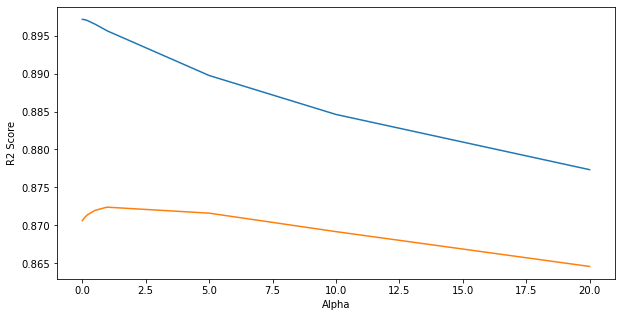

In [59]:
# Plotting line graph to see mean train and test scores for different R2 and alpha values.
plt.figure(figsize=(10,5))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [60]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [61]:
# Using best alpha value 1 for ridge regression
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8947889325923553
0.8798144801445618


In [62]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [63]:
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
22,LowQualFinSF,0.493867
67,Neighborhood_IDOTRR,0.467014
24,BsmtFullBath,0.466301
20,1stFlrSF,0.408058
12,BsmtFinType1,0.363758
69,Neighborhood_Mitchel,0.358545
27,HalfBath,0.332017
52,LandContour_HLS,0.328243
23,GrLivArea,0.319474
25,BsmtHalfBath,0.315727


In [64]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr: ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr: ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr:  0.8885183844122007
r2_test_lr:  0.8815384523369565
rss1_lr:  103.67790249665342
rss2_lr:  55.021223590676684
mse_train_lr:  0.11148161558779937
mse_test_lr:  0.13789780348540523


## Linear Regression

In [65]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

4869475678.902085
[ 2.16868920e-01  1.76358005e-01 -1.32554717e+12 -5.23345705e+11
 -1.41718651e+12  1.22780513e+12 -5.92184003e+11 -7.68444994e+11
 -7.47205058e+10  8.04150098e+11  1.92077637e-01  5.19226074e-01
  3.04077148e-01  3.37829590e-01  2.07588196e-01  1.34307861e-01
  2.49526978e-01  3.25073242e-01  1.80755615e-01  4.22149658e-01
  2.13150024e-01  5.45013428e-01  3.46313477e-01  5.23254395e-01
  3.76510620e-01  1.70166016e-01  4.72387314e-01  2.96707153e-01
  1.06269836e-01 -4.00519591e+09 -3.85620117e-01 -4.94319916e-01
 -3.36242676e-01 -4.98809814e-01  2.29148865e-01  4.00519591e+09
  5.61752319e-01 -3.09898376e-01 -5.80650330e-01 -5.97359657e-01
 -9.89025187e+10 -6.44470215e-01 -2.21984863e-01  9.89025187e+10
  2.22625732e-01  2.62351990e-01  1.09344482e-01  1.92932129e-01
  1.80969238e-01  1.68823242e-01  2.33886719e-01  3.33038330e-01
  2.70502567e-01 -4.86947568e+09 -4.86947568e+09 -4.86947568e+09
 -4.86947568e+09 -4.86947568e+09  2.08621979e-01 -1.41132355e-01
 -1.818

In [67]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr: ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr: ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr: ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr: ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr: ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr: ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr:  0.896175438059745
r2_test_lr:  -8.558966010688789e+16
rss1_lr:  96.55684260443715
rss2_lr:  3.97533876493515e+19
mse_train_lr:  0.103824561940255
mse_test_lr:  9.963255049962782e+16


In [68]:
# Creating a table of metrics to compare!

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Lasso Regression': metric
        }

ls_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Lasso Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
lr_metric = pd.Series(metric3, name = 'Linear Regression')

final_metric = pd.concat([ls_metric, lr_metric, rg_metric], axis = 1)

final_metric

,Metric,Lasso Regression,Linear Regression,Ridge Regression
0,R2 Score (Train),0.888518,8.961754e-01,0.888518
1,R2 Score (Test),0.881538,-8.558966e+16,0.881538
2,RSS (Train),103.677902,9.655684e+01,103.677902
3,RSS (Test),55.021224,3.975339e+19,55.021224
4,MSE (Train),0.333889,3.222182e-01,0.333889
5,MSE (Test),0.371346,3.156462e+08,0.371346


# Comparing the coefficients

In [69]:
Comp = pd.DataFrame(index=X_train.columns)

In [70]:
Comp.rows = X_train.columns

In [71]:
Comp['Linear'] = lm.coef_
Comp['Ridge'] = ridge.coef_
Comp['Lasso'] = lasso.coef_

In [72]:
# Comparing the coeficients to see which is the best model amongst Linear, Ridge, Lasso! 
pd.set_option('display.max_rows', None)
Comp

,Linear,Ridge,Lasso
OverallQual,2.168689e-01,0.226101,0.241243
BsmtQual,1.763580e-01,0.169765,0.164909
BsmtFinSF1,-1.325547e+12,0.112193,0.135313
BsmtFinSF2,-5.233457e+11,0.035364,0.043521
BsmtUnfSF,-1.417187e+12,-0.021126,-0.000000
TotalBsmtSF,1.227805e+12,0.111813,0.084540
1stFlrSF,-5.921840e+11,0.135345,0.052401
2ndFlrSF,-7.684450e+11,0.112803,0.000000
LowQualFinSF,-7.472051e+10,0.002751,-0.017750
GrLivArea,8.041501e+11,0.207720,0.321971


#### After creating model in Linear, Ridge and Lasso  Regression we can see that the r2_scores are almost same for both Ridge and Lasso but as lasso will penalize more on the dataset and can also help in feature elemination we shall consider or Select the model with Lasso Regression as the final model.

# Final Model (Lasso Regression)

In [73]:
# Final Model with alpha 0.001 with Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8885183844122007
0.8815384523369565


###  PCA for Feature Importance

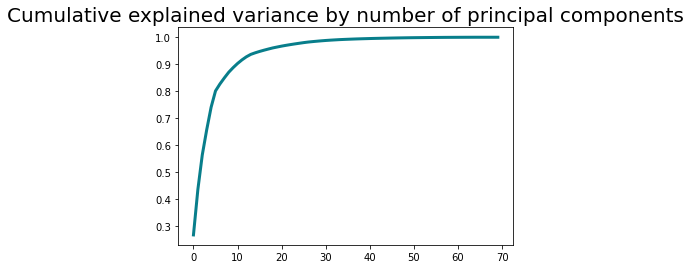

In [74]:
# Using PCA to get best features
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

- explains about around 90ish%

In [75]:
scores = pd.DataFrame(data=pca.components_.T * np.sqrt(pca.explained_variance_), columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],index=X_train.columns)
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
OverallQual,0.809791,0.231843,-0.139988,-0.109978,-0.022982,0.341569,-0.106315,0.323128,-0.054959,-0.120568,-0.068522,0.018069,0.060933,-0.009628,0.004996,0.002927,-0.018575,-0.004643,-0.003069,0.000309,0.004843,0.009159,0.000997,0.001404,-0.004465,0.000517,-0.003507,-0.002892,-0.001234,-0.000121,0.001901,0.001325,0.001411,-0.001543,-0.000022,0.000416,0.000621,0.000130,-0.000125,0.000035,-0.000687,-0.000383,0.000346,-0.000280,0.000027,0.000334,-0.000365,-0.000211,-0.000112,-0.000521,-0.000328,-0.000043,0.000210,0.000317,-0.000049,-0.000024,-0.000023,0.000509,-0.000110,0.000012,-0.000004,-0.000007,-0.000039,-0.000037,-0.000032,-5.990085e-32,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
BsmtQual,0.419322,0.055039,-0.110596,-0.127636,0.020659,0.269203,0.035701,-0.203693,-0.074002,-0.104645,-0.058669,0.063314,-0.248602,0.055724,-0.023146,-0.027370,-0.029996,-0.007796,0.022531,-0.005124,-0.003770,-0.000112,0.000140,-0.004359,0.003377,-0.010169,-0.000222,-0.001805,-0.000518,0.000086,-0.000497,0.000882,-0.002819,0.000793,-0.000013,-0.000609,-0.001169,-0.000800,0.000161,-0.001078,-0.000168,0.001257,0.000666,-0.000085,0.000049,0.000402,0.000596,0.000053,-0.000119,-0.000241,0.000211,0.000160,0.000148,-0.000040,-0.000433,-0.000279,-0.000083,-0.000197,0.000089,-0.000052,0.000021,-0.000071,0.000062,0.000083,-0.000173,-6.920669e-33,-2.123563e-32,-2.003697e-32,-5.488735e-34,5.056127e-34
BsmtFinSF1,0.284600,-0.567507,-0.691690,-0.218155,0.198346,-0.109592,-0.114470,-0.050764,0.045171,0.012124,0.039917,0.012439,0.028112,-0.006413,0.003238,0.007639,-0.002931,-0.001941,0.003881,-0.002755,0.006284,0.002729,0.000123,-0.000271,-0.003494,0.003135,-0.000294,0.001065,-0.001511,-0.001457,-0.000093,-0.001088,0.002473,0.000296,0.000681,-0.001234,0.001079,-0.000058,0.000567,0.000351,-0.000111,-0.000564,0.000396,-0.000159,0.000157,0.000184,0.000003,0.000045,-0.000023,-0.000114,-0.000165,0.000090,0.000003,-0.000104,-0.000032,0.000160,0.000135,-0.000037,-0.000036,0.000029,0.000018,0.000060,-0.000012,-0.000053,0.000031,-3.930666e-16,4.825659e-17,1.515428e-17,-3.412907e-19,-2.653066e-18
BsmtFinSF2,-0.052400,-0.190936,-0.184879,0.813523,-0.430001,0.277751,-0.028795,-0.042641,0.027729,-0.004037,0.011218,0.006832,0.012283,-0.002883,0.004497,-0.003777,0.001965,-0.000380,0.001690,-0.000930,0.002854,0.002495,0.000437,0.000825,-0.000279,0.000451,-0.000921,-0.000190,-0.000443,0.000816,-0.000040,-0.000742,0.000433,0.000894,0.000452,-0.000314,0.000336,-0.000847,-0.000044,-0.000199,0.000078,0.000002,-0.000145,-0.000025,-0.000086,0.000046,0.000026,-0.000087,-0.000069,-0.000167,0.000044,-0.000036,-0.000039,-0.000050,-0.000168,0.000102,0.000083,0.000013,0.000016,-0.000002,0.000018,-0.000075,0.000008,0.000037,0.000029,-1.551885e-16,1.905242e-17,5.983136e-18,-1.347466e-19,-1.047470e-18
BsmtUnfSF,0.460983,0.221161,0.846711,-0.012781,-0.025258,-0.057854,-0.120959,-0.044701,-0.006005,0.019319,0.033180,-0.013644,-0.010295,0.001813,-0.001871,0.006595,-0.000295,-0.001663,0.006222,-0.002529,0.004052,0.004056,0.003147,0.000428,-0.001858,-0.000653,-0.000011,0.000718,-0.001250,0.000095,-0.000958,-0.000542,0.001919,0.001412,0.000769,-0.001849,0.001105,0.000299,0.000446,0.000592,-0.000069,-0.000225,0.000212,-0.000088,-0.000048,0.000132,-0.000208,0.000246,-0.000167,0.000059,0.000046,0.000111,-0.000007,-0.000105,-0.000017,0.000105,0.000234,-0.000097,0.000029,-0.000009,-0.000041,0.000068,-0.000005,0.000022,0.000005,-4.202406e-16,5.159273e-17,1.620195e-17,-3.648852e-19,-2.836481e-18


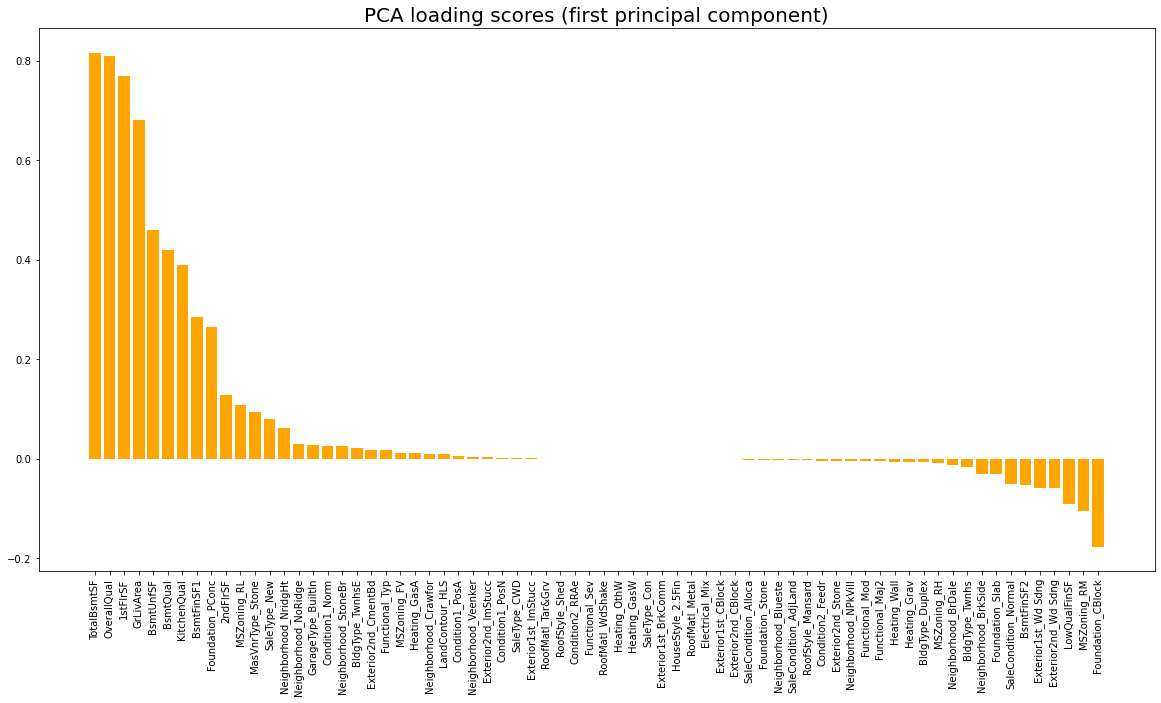

In [86]:
# Visualising the feature importance
pc1_scores = scores.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_scores = pc1_scores.reset_index()
pc1_scores.columns = ['Attribute', 'CorrelationWithPC1']
plt.figure(figsize=(20,10))
plt.bar(x=pc1_scores['Attribute'], height=pc1_scores['CorrelationWithPC1'], color='Orange')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

- Best features explaning the dataset: - 
    - TotalBsmtSF: Total square feet of basement area
    - OverallQual: Rates the overall material and finish of the house
    - 1stFlrSF: First Floor square feet
    - GrLivArea: Above grade (ground) living area square feet
    - BsmtUnfSF: Unfinished square feet of basement area

## Best alpha value for Lasso : 0.001

## Best alpha value for Ridge : 1